<a href="https://colab.research.google.com/github/kalc1/CIT-99-Machine-Learning/blob/main/FinalProjectTemplate_KevinAlcocer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describe your project and data set:
## Name: Kevin Alcocer

My dataset classifies satellite images into 6 different land cover classes (impervious, farm, forest, grass, orchard, water).

I will use 2 different models to predict which. KNN will be used as a supervised algorithm and K-Means Clustering as an unsupervised machine learning model.

The column names are dates given in the format yyyymmdd_N. The ending _N tells us this is a normalized difference vegetation index (NDVI) value. NDVI is used to quantify vegetation greenness on a map. The value is calculated as a ratio between red (R) and near infrared (NIR) values.

# Accessing Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, silhouette_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# read data into a variable called data
data = pd.read_csv("/content/drive/MyDrive/FCC/Machine Learning/Crowd Sourced Satellite Images Data/Satellite Data.csv")

# Data Exploration

In [3]:
# run data summary statistics for numeric data
data.describe()

,max_ndvi,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
count,9979.000000,9985.000000,9978.000000,9975.000000,9981.000000,9978.000000,9983.000000,9986.000000,9981.000000,9982.000000,...,9983.000000,9988.000000,9985.000000,9985.000000,9982.00000,9978.000000,9981.000000,9982.000000,9987.000000,9980.000000
mean,7289.260813,5716.627953,4779.933431,4356.228388,5077.582140,2884.544094,4907.662818,3335.410134,4916.219467,4254.089674,...,4791.941144,3647.748408,3033.378297,3027.919459,2041.46051,2705.751226,2059.305556,6117.821471,2575.328247,2561.146035
std,1599.346697,2283.758155,2735.529934,2867.599452,2512.535791,2683.842888,2578.155360,2421.276133,2689.689160,2783.651252,...,2745.399730,2301.025048,2060.077040,2181.035669,2020.21011,2413.292267,2211.156799,1938.801711,2341.440627,2413.624205
min,563.444000,-433.735000,-1781.790000,-2939.740000,-2350.200000,-1815.630000,-5992.080000,-1677.600000,-2624.640000,-3403.050000,...,-3765.860000,-1043.160000,-4869.010000,-1505.780000,-1445.37000,-4354.630000,-232.292000,-6807.550000,-2139.860000,-3647.610000
25%,7293.095000,4026.930000,2065.682500,1460.860000,2983.780000,528.416000,2474.145000,1013.682500,2340.840000,1376.080000,...,2007.555000,1391.065000,1404.860000,1010.460000,429.90575,772.985250,494.605000,5661.880000,691.113000,688.236250
50%,7885.830000,6740.590000,5268.475000,4394.340000,5586.540000,1589.145000,5653.400000,2859.840000,5693.140000,4294.775000,...,5291.340000,3619.010000,2678.770000,2628.030000,1247.87000,1518.785000,930.561000,6867.680000,1522.180000,1462.065000
75%,8123.125000,7590.090000,7486.885000,7316.405000,7440.850000,5512.895000,7250.785000,5513.022500,7401.160000,7152.385000,...,7550.520000,5824.920000,4178.930000,4856.030000,3017.82500,4560.467500,2963.460000,7378.072500,4246.375000,4102.425000
max,8650.500000,8377.720000,8566.420000,8650.500000,8516.100000,8267.120000,8499.330000,8001.700000,8452.380000,8422.060000,...,8489.970000,7981.820000,8445.410000,7919.070000,8206.78000,8235.400000,8247.630000,8410.330000,8418.230000,8502.020000


In [4]:
# determine missing values in data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       9984 non-null   object 
 1   max_ndvi    9979 non-null   float64
 2   20150720_N  9985 non-null   float64
 3   20150602_N  9978 non-null   float64
 4   20150517_N  9975 non-null   float64
 5   20150501_N  9981 non-null   float64
 6   20150415_N  9978 non-null   float64
 7   20150330_N  9983 non-null   float64
 8   20150314_N  9986 non-null   float64
 9   20150226_N  9981 non-null   float64
 10  20150210_N  9982 non-null   float64
 11  20150125_N  9981 non-null   float64
 12  20150109_N  9982 non-null   float64
 13  20141117_N  9980 non-null   float64
 14  20141101_N  9983 non-null   float64
 15  20141016_N  9980 non-null   float64
 16  20140930_N  9987 non-null   float64
 17  20140813_N  9980 non-null   float64
 18  20140626_N  9976 non-null   float64
 19  20140610_N  9983 non-null  

In [5]:
# Display the count for each item in the Target if categorical or  histogram target is continuous.
# If Unsupervised choose a column to create a bar or histogram
data['class'].value_counts()

class
forest        7057
farm          1354
impervious     907
grass          426
water          190
orchard         50
Name: count, dtype: int64

In [6]:
# create any new columns based on columns that exist
data.drop(columns=['max_ndvi'], inplace=True)

In [7]:
# create the correlation matrix for numerical data
correlation_matrix = data.select_dtypes(include='number').corr()
correlation_matrix

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
20150720_N,1.000000,0.195112,0.331078,0.472720,0.114786,0.206036,0.027052,0.289970,0.159604,0.266019,...,0.237494,0.342058,0.191129,0.200693,0.102761,0.201934,0.055430,0.499051,0.128778,0.140986
20150602_N,0.195112,1.000000,0.212706,0.192916,0.496401,0.416533,0.236037,0.321302,0.462418,0.459526,...,0.403061,0.088559,0.129326,0.035795,0.354488,0.199124,0.449091,0.379972,0.442659,0.241461
20150517_N,0.331078,0.212706,1.000000,0.420695,0.082337,0.191423,0.044285,0.291765,0.114916,0.148574,...,0.130462,0.178872,0.043688,0.203987,0.079056,0.222044,0.103756,0.376031,0.072957,0.119894
20150501_N,0.472720,0.192916,0.420695,1.000000,0.113530,0.224509,0.018323,0.301882,0.112252,0.200786,...,0.220206,0.246265,0.074398,0.216629,0.021622,0.316382,0.087215,0.490173,0.103288,0.037877
20150415_N,0.114786,0.496401,0.082337,0.113530,1.000000,0.372682,0.060125,0.294871,0.480843,0.428262,...,0.417889,-0.051997,0.029004,-0.138903,0.320949,0.187697,0.499469,0.221284,0.515903,0.145073
20150330_N,0.206036,0.416533,0.191423,0.224509,0.372682,1.000000,0.240624,0.254547,0.357240,0.432997,...,0.271848,0.059931,0.085996,0.093792,0.254076,0.166841,0.299560,0.421715,0.292231,0.166221
20150314_N,0.027052,0.236037,0.044285,0.018323,0.060125,0.240624,1.000000,0.183727,0.193623,0.270870,...,0.072835,0.060034,0.045766,0.142703,0.283811,0.034431,0.207706,0.222337,0.113909,0.195793
20150226_N,0.289970,0.321302,0.291765,0.301882,0.294871,0.254547,0.183727,1.000000,0.356398,0.280980,...,0.317137,0.121085,0.107269,0.069963,0.204728,0.243871,0.236849,0.473102,0.267959,0.193268
20150210_N,0.159604,0.462418,0.114916,0.112252,0.480843,0.357240,0.193623,0.356398,1.000000,0.523964,...,0.498547,0.000593,0.039662,-0.093555,0.346734,0.097000,0.478943,0.395425,0.593618,0.130214
20150125_N,0.266019,0.459526,0.148574,0.200786,0.428262,0.432997,0.270870,0.280980,0.523964,1.000000,...,0.398852,0.051445,-0.001191,0.013042,0.304905,0.270935,0.389676,0.496110,0.451475,0.347251


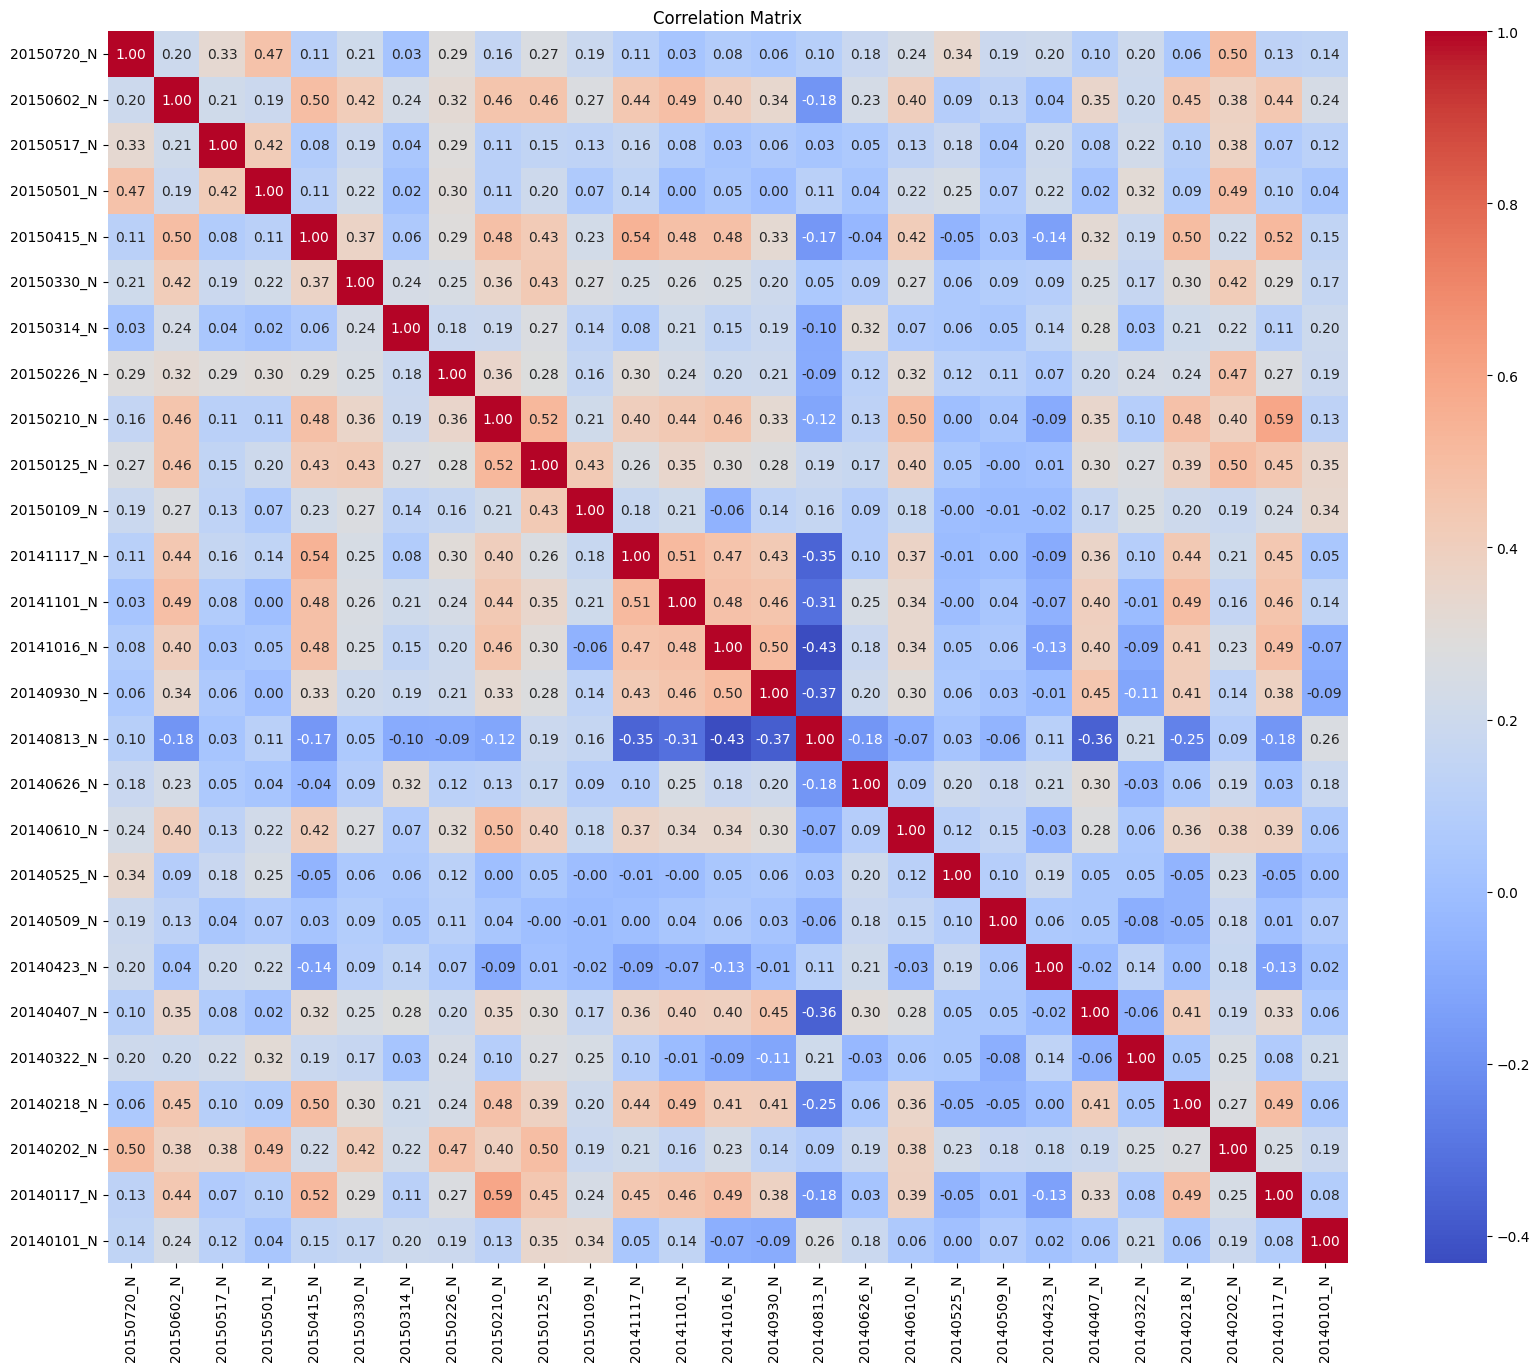

In [8]:
# create a graph of the data
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Split the data into training and testing data sets using your random_state(969) value and split the data 70/30
# split data into X_train, X_test, y_train, y_test variables

# Define X (features) and y (target variable)
X = data
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=969)

# Data Preprocessing


## Dealing with numerical data

In [10]:
# separate data into categorical(nominal - labels without order) and numerical data
# if a categorical column contains numbers that indicate order change them to numeric data
numeric_data = data.select_dtypes(include='number')
classes_col = data['class'].unique()

In [11]:
# replace missing values with median for numeric data
num_imputer = SimpleImputer(strategy='median')
num_imputer.fit(data[numeric_data.columns])

data[numeric_data.columns] = num_imputer.transform(data[numeric_data.columns])

In [12]:
# create polynomial features if your are running a regression model

I am not running a regression model

In [13]:
# scale the numeric data
scaler = StandardScaler()

scaler.fit(data[numeric_data.columns])
scaled_numeric_data = scaler.transform(data[numeric_data.columns])

## Dealing with categorical data

In [14]:
# replace missing categorical values with most_frequent and then use one hot encoder
cat_col = data.select_dtypes(include='object').columns

cat_imputer = SimpleImputer(strategy='most_frequent')
data[cat_col] = cat_imputer.fit_transform(data[cat_col])

Label Encoder is used in place of one hot encoder



In [15]:
onehot_encoder = OneHotEncoder()
label_encoder = LabelEncoder()
data['class_encoded'] = label_encoder.fit_transform(data['class'])

encoded_classes = data['class_encoded'].unique()
original_classes = data['class'].unique()

print("Original classes:", original_classes)
print("Encoded classes:", encoded_classes, "\n")

for original_class, encoded_class in zip(original_classes, encoded_classes):
    print(f"{original_class}: class {encoded_class}")

Original classes: ['forest' 'farm' 'impervious' 'grass' 'water' 'orchard']
Encoded classes: [1 0 3 2 5 4] 

forest: class 1
farm: class 0
impervious: class 3
grass: class 2
water: class 5
orchard: class 4


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   class          9999 non-null   object 
 1   20150720_N     9999 non-null   float64
 2   20150602_N     9999 non-null   float64
 3   20150517_N     9999 non-null   float64
 4   20150501_N     9999 non-null   float64
 5   20150415_N     9999 non-null   float64
 6   20150330_N     9999 non-null   float64
 7   20150314_N     9999 non-null   float64
 8   20150226_N     9999 non-null   float64
 9   20150210_N     9999 non-null   float64
 10  20150125_N     9999 non-null   float64
 11  20150109_N     9999 non-null   float64
 12  20141117_N     9999 non-null   float64
 13  20141101_N     9999 non-null   float64
 14  20141016_N     9999 non-null   float64
 15  20140930_N     9999 non-null   float64
 16  20140813_N     9999 non-null   float64
 17  20140626_N     9999 non-null   float64
 18  20140610

## Combining the categorical and numerical data into a dataframe

In [17]:
# code to combine all the features
### Convert the scaled numeric data back to a DataFrame

scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_data.columns)
combined_data = pd.concat([scaled_numeric_df, data['class_encoded']], axis=1)

In [18]:
combined_data.head()

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N,class_encoded
0,0.909761,1.194865,-0.707640,1.074324,1.819555,1.164156,-1.095682,1.139502,1.107505,0.990979,...,-1.338783,-0.777262,1.147390,-0.592641,2.158629,0.284800,0.851681,1.183131,-0.137724,1
1,0.958075,-0.043423,-0.491583,1.105317,1.451539,-0.177959,-1.237553,0.960421,1.162051,0.897660,...,1.351658,-0.240847,1.779160,-0.702319,1.811776,0.227060,-0.379903,-0.600365,0.268229,1
2,-1.892077,-0.365196,0.473744,0.338171,-0.619383,-1.180364,0.694660,0.817041,0.599239,0.411961,...,-0.686113,1.058062,0.391356,0.490078,-0.112062,-0.442992,0.501101,-0.724694,-0.494703,0
3,-1.680227,-0.995960,-0.923617,-1.349810,-0.400032,-1.303711,-0.510973,-1.261543,-0.749950,-0.833469,...,-0.638610,-0.684669,-0.600826,-0.513199,-0.766078,-0.607718,-2.007594,-0.671038,-0.867915,3
4,0.806570,0.220339,1.128567,0.800944,1.523643,0.918133,-1.116541,-0.989106,1.293468,-0.223047,...,-1.061867,0.725657,-0.954116,1.341273,-0.461909,-0.621298,0.677955,0.149545,-0.866243,1


In [19]:
# If necessary reduce the number of columns using PCA
n_columns = 15
pca = PCA(n_components= n_columns)

combined_data_pca = pca.fit_transform(combined_data)
combined_data_pca.shape

(9999, 15)

In [20]:
### Create the Column Transformer for the Pipeline to preprocess the data for numeric
# and categorical data

# Redefine values and split data to account for new column created
X = data.drop(columns=['class_encoded'])
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=969)

num_columns = data.select_dtypes(include='number').drop(columns=['class_encoded']).columns
cat_columns = ['class']


num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
  # ('encoder', LabelEncoder())
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
        ('num', num_transformer, num_columns),
        ('cat', cat_transformer, cat_columns)
], remainder='passthrough')

In [21]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [22]:
# Create the Pipeline for each model you want to train
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca)
])

# Create your Model
You are to select two models to run.  Select the one you worked with in the Udemy course.  Make sure you print out the metrics to compare the two models.

## 1st Model: K Nearest Neighbor

In [23]:
# Create the first model
KNN = KNeighborsClassifier(n_neighbors=5)

KNN_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', KNN)
])

In [24]:
# fit the model
KNN_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['20150720_N', '20150602_N', '20150517_N', '20150501_N', '20150415_N',
       '20150330_N', '20150314_N', '20150226_N', '20150210_N', '20150125_N',
       '20150109_N', '20141117_N', '...
       '20140813_N', '20140626_N', '20140610_N', '20140525_N', '20140509_N',
       '20140423_N', '20140407_N', '20140322_N', '20140218_N', '20140202_N',
       '20140117_N', '20140101_N'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['class'])])),
                ('pca', PCA(n_components=15)),
                ('classifier', KNeighborsClassifier())])

In [25]:
# predict using test and training data sets
y_train_pred = KNN_pipeline.predict(X_train)

y_test_pred = KNN_pipeline.predict(X_test)

In [26]:
# create the metrics for both training and test data sets
# print it out
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Score difference", train_accuracy - test_accuracy)

Training Accuracy: 0.970567223889127
Testing Accuracy: 0.9566666666666667
Score difference 0.013900557222460308


## Is the model overfitting?


In [27]:
#  Enter your answer make sure to make each line a comment (#)
# Since the training and testing accuracy are very similar, the model is not overfitting.
# A difference of ~0.015 indicates the models perform similarly

## 2nd Model: K-Means Clustering

In [28]:
# Create the second model
kmeans = KMeans(n_clusters=len(original_classes)) # Number of clusters will equal the number of unique labels in the 'class' column

kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('clusterer', kmeans)  # Use KMeans as the final step
])

In [29]:
# fit the model
kmeans_pipeline.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['20150720_N', '20150602_N', '20150517_N', '20150501_N', '20150415_N',
       '20150330_N', '20150314_N', '20150226_N', '20150210_N', '20150125_N',
       '20150109_N', '20141117_N', '...
       '20140813_N', '20140626_N', '20140610_N', '20140525_N', '20140509_N',
       '20140423_N', '20140407_N', '20140322_N', '20140218_N', '20140202_N',
       '20140117_N', '20140101_N'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['class'])])),
                ('pca', PCA(n_components=15)),
                ('clusterer', KMeans(n_clusters=6))])

In [30]:
# predict using test and training data sets
train_cluster = kmeans_pipeline.predict(X_train)
test_cluster = kmeans_pipeline.predict(X_test)

In [31]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[ 4.62863506e+00,  3.07597621e+00,  8.10315984e-01,
        -9.45952263e-02, -3.42330818e-01,  2.20083160e-01,
        -4.12033168e-01,  5.53704005e-02,  7.54345240e-02,
        -3.57407060e-02, -3.70628828e-02, -1.64238862e-02,
         1.65842819e-02, -1.04327525e-01,  1.77328009e-01],
       [-3.14386452e+00,  9.60830069e-01, -8.41756932e-02,
        -4.26251715e-01, -1.18700278e-01,  2.82201020e-02,
         2.93395765e-02,  3.46737532e-02, -2.67063319e-02,
        -3.98260919e-02,  6.78885907e-02,  2.63610055e-03,
         2.44792532e-02, -3.37020720e-02,  2.95319436e-03],
       [ 2.20125449e+00, -1.58210781e+00, -1.03420060e+00,
        -1.34832149e+00, -2.95762907e-01,  1.88613743e-01,
         4.22972243e-02, -1.28638121e-01, -2.83810118e-01,
         1.31160045e-01,  5.63404879e-02, -3.18361719e-02,
         4.02195296e-02, -7.19768907e-02, -5.28588933e-02],
       [ 3.71261813e-01, -1.97394443e+00,  2.08014242e+00,
        -2.20756533e-01,  5.88826226e-01, -5.39555174

In [32]:
cluster_labels = kmeans.labels_
print(list(cluster_labels))

[5, 4, 5, 4, 2, 4, 5, 1, 1, 4, 1, 5, 5, 2, 5, 2, 2, 5, 3, 3, 2, 0, 1, 1, 5, 4, 2, 2, 1, 1, 3, 1, 5, 1, 4, 3, 1, 3, 1, 3, 2, 3, 5, 3, 5, 1, 5, 5, 5, 1, 1, 0, 2, 1, 4, 3, 1, 4, 4, 4, 5, 5, 2, 1, 2, 5, 5, 5, 4, 4, 2, 0, 4, 5, 1, 1, 1, 3, 1, 1, 1, 1, 5, 1, 1, 4, 0, 5, 3, 1, 4, 1, 3, 5, 3, 5, 1, 2, 1, 4, 0, 3, 1, 3, 1, 1, 3, 1, 1, 5, 5, 1, 4, 5, 2, 2, 2, 4, 2, 0, 1, 4, 2, 1, 1, 4, 5, 3, 5, 4, 2, 1, 3, 0, 5, 2, 0, 1, 5, 5, 3, 5, 3, 3, 2, 4, 1, 0, 5, 1, 5, 2, 0, 1, 2, 1, 0, 3, 5, 1, 5, 0, 1, 0, 0, 0, 5, 1, 4, 4, 2, 3, 0, 4, 2, 3, 4, 2, 4, 3, 0, 3, 5, 3, 5, 4, 5, 5, 1, 1, 3, 2, 4, 1, 5, 5, 1, 3, 1, 3, 5, 5, 2, 1, 2, 5, 3, 0, 1, 4, 4, 1, 5, 0, 0, 4, 1, 1, 0, 1, 1, 0, 0, 5, 4, 2, 1, 1, 5, 5, 5, 2, 5, 5, 5, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 5, 4, 5, 5, 5, 5, 1, 2, 4, 2, 5, 5, 3, 4, 2, 1, 1, 0, 5, 2, 2, 0, 5, 5, 0, 1, 1, 1, 2, 5, 2, 3, 4, 4, 1, 5, 0, 5, 1, 3, 1, 4, 1, 1, 4, 4, 3, 5, 5, 4, 3, 1, 0, 0, 4, 5, 3, 4, 4, 1, 4, 2, 0, 3, 4, 2, 4, 1, 1, 1, 5, 1, 0, 3, 1, 0, 0, 1, 1, 5, 5, 3, 1, 1, 1, 5, 5, 

In [33]:
# create the metrics for both training and test data sets
# print it out
silhouette_train = silhouette_score(X_train_preprocessed, train_cluster)
silhouette_test = silhouette_score(X_test_preprocessed, test_cluster)

print("Training Silhouette Score:", silhouette_train)
print("Testing Silhouette Score:", silhouette_test)
print("Score difference", silhouette_train - silhouette_test)

Training Silhouette Score: 0.144679428301699
Testing Silhouette Score: 0.14291713884947646
Score difference 0.0017622894522225374


## Is the model overfitting?

In [34]:
#  Enter your answer make sure to make each line a comment (#)
# The model is not overfitting as the testing and training scores are very similar.
# A difference of less than 0.01 indicates the model is not overfitting.

# Compare the two models
Which one is better?

In [35]:
#  Enter your answer make sure my make each line a comment (#)
# The KNN model vastly outperformed the unsupervised model.
# With an accuracy score above 0.95, it proved to be the best model to use.